Integrantes:

- Victoria Alvarez
- Franco Berrios
- Felipe Manoli
- Cristobal Muñoz

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [19]:
datosapple = pd.read_csv('C:/Users/Knalla/Desktop/Analisis de datos/Tarea 3/applemobilitytrends-2021-12-08.csv')
datosgoogle = pd.read_csv('C:/Users/Knalla/Desktop/Analisis de datos/Tarea 3/Global_Mobility_Report.csv')
## Se importan los datos de cada una de las fuentes.

C:\Users\Knalla\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Knalla\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [20]:
datosapple

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,166.94,152.35,151.20,141.39,163.52,172.67,162.12,156.23,150.23,171.58
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,164.26,181.32,224.26,210.36,215.39,214.93,156.72,191.94,208.66,244.65
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,86.90,93.26,100.08,104.56,135.03,146.15,91.97,97.89,128.10,98.74
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,89.50,94.21,99.95,103.63,125.52,123.87,71.43,102.94,122.42,84.15
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,120.49,128.27,130.51,135.67,143.79,113.66,121.15,124.25,128.52,138.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,county,York County,walking,NaN,Pennsylvania,United States,100.0,110.22,121.82,109.72,...,184.97,200.06,200.28,204.75,242.15,245.19,157.62,197.62,186.69,191.71
4687,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,147.09,160.43,133.94,163.62,270.80,177.71,133.40,164.36,166.46,176.96
4688,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,161.02,160.95,170.27,164.70,201.53,190.09,132.93,155.47,168.96,169.29
4689,county,Yuma County,driving,NaN,Arizona,United States,100.0,101.82,106.67,108.93,...,149.77,146.23,149.87,149.14,179.34,158.87,125.10,151.27,156.07,157.59


In [21]:
datosapplechile=datosapple[datosapple['country']=='Chile']
datosapplechile
## Filtramos los datos en base a Chile obteniendo los resultados de gente que maneja o camina.

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08
791,city,Santiago,driving,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,101.96,105.49,107.92,...,101.78,109.77,116.10,115.88,154.11,134.38,84.19,115.82,140.95,94.69
792,city,Santiago,walking,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,104.69,106.20,105.99,...,97.68,106.98,115.78,111.88,137.30,109.89,62.87,115.53,132.06,80.57
975,sub-region,Antofagasta Region,driving,Región de Antofagasta,NaN,Chile,100.0,101.46,110.43,108.15,...,155.67,180.65,181.78,185.20,247.61,235.88,165.80,190.84,194.69,188.17
989,sub-region,Araucanía Region,driving,Región de la Araucanía,NaN,Chile,100.0,95.16,90.97,99.93,...,72.01,76.39,76.18,80.67,110.40,108.39,88.37,86.39,96.76,101.72
990,sub-region,Arica and Parinacota Region,driving,Región de Arica y Parinacota,NaN,Chile,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,sub-region,Atacama Region,driving,Región de Atacama,NaN,Chile,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,sub-region,Aysén del General Carlos Ibáñez del Campo Region,driving,Región Aysén del General Carlos Ibáñez del Cam...,NaN,Chile,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1039,sub-region,Biobío Region,driving,Región del Biobío,NaN,Chile,100.0,103.67,104.55,113.17,...,125.08,127.11,133.32,136.00,180.48,180.25,137.80,146.31,160.20,148.64
1040,sub-region,Biobío Region,walking,Región del Biobío,NaN,Chile,100.0,112.80,95.68,88.51,...,167.62,177.10,172.78,171.70,201.23,153.28,94.68,193.37,204.70,127.14
1189,sub-region,Coquimbo Region,driving,Región de Coquimbo,NaN,Chile,100.0,100.67,109.55,108.56,...,95.44,100.69,94.91,113.49,150.89,170.06,104.74,123.68,128.12,112.64


In [22]:
datosapplechilerm=datosapple[datosapple['region']=='Santiago']
datosapplechilerm
## Filtramos los dator por RM.


,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08
791,city,Santiago,driving,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,101.96,105.49,107.92,...,101.78,109.77,116.10,115.88,154.11,134.38,84.19,115.82,140.95,94.69
792,city,Santiago,walking,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,104.69,106.20,105.99,...,97.68,106.98,115.78,111.88,137.30,109.89,62.87,115.53,132.06,80.57


In [23]:
datosapplechilerm.drop(['geo_type', 'region', 'alternative_name', 'country', 'sub-region'],axis = 1, inplace = True)
datosapplechilerm
## Eliminamos las columnas innecesarias para la respuesta.

C:\Users\Knalla\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,...,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08
791,driving,100.0,101.96,105.49,107.92,120.69,98.55,67.72,95.29,98.78,...,101.78,109.77,116.10,115.88,154.11,134.38,84.19,115.82,140.95,94.69
792,walking,100.0,104.69,106.20,105.99,105.57,69.28,43.79,94.13,95.19,...,97.68,106.98,115.78,111.88,137.30,109.89,62.87,115.53,132.06,80.57


In [24]:
tabla = datosapplechilerm.melt(id_vars=['transportation_type'], var_name="fecha", value_name="cantidad") 
tabla
## Creamos la columna fecha y cantidad.

,transportation_type,fecha,cantidad
0,driving,2020-01-13,100.00
1,walking,2020-01-13,100.00
2,driving,2020-01-14,101.96
3,walking,2020-01-14,104.69
4,driving,2020-01-15,105.49
...,...,...,...
1387,walking,2021-12-06,115.53
1388,driving,2021-12-07,140.95
1389,walking,2021-12-07,132.06
1390,driving,2021-12-08,94.69


In [25]:
camina=tabla[tabla['transportation_type']=='walking']
maneja=tabla[tabla['transportation_type']=='driving']
## Se crean las tablas 'camina' y 'maneja'.

In [26]:
camina

,transportation_type,fecha,cantidad
1,walking,2020-01-13,100.00
3,walking,2020-01-14,104.69
5,walking,2020-01-15,106.20
7,walking,2020-01-16,105.99
9,walking,2020-01-17,105.57
...,...,...,...
1383,walking,2021-12-04,109.89
1385,walking,2021-12-05,62.87
1387,walking,2021-12-06,115.53
1389,walking,2021-12-07,132.06


In [27]:
maneja

,transportation_type,fecha,cantidad
0,driving,2020-01-13,100.00
2,driving,2020-01-14,101.96
4,driving,2020-01-15,105.49
6,driving,2020-01-16,107.92
8,driving,2020-01-17,120.69
...,...,...,...
1382,driving,2021-12-04,134.38
1384,driving,2021-12-05,84.19
1386,driving,2021-12-06,115.82
1388,driving,2021-12-07,140.95


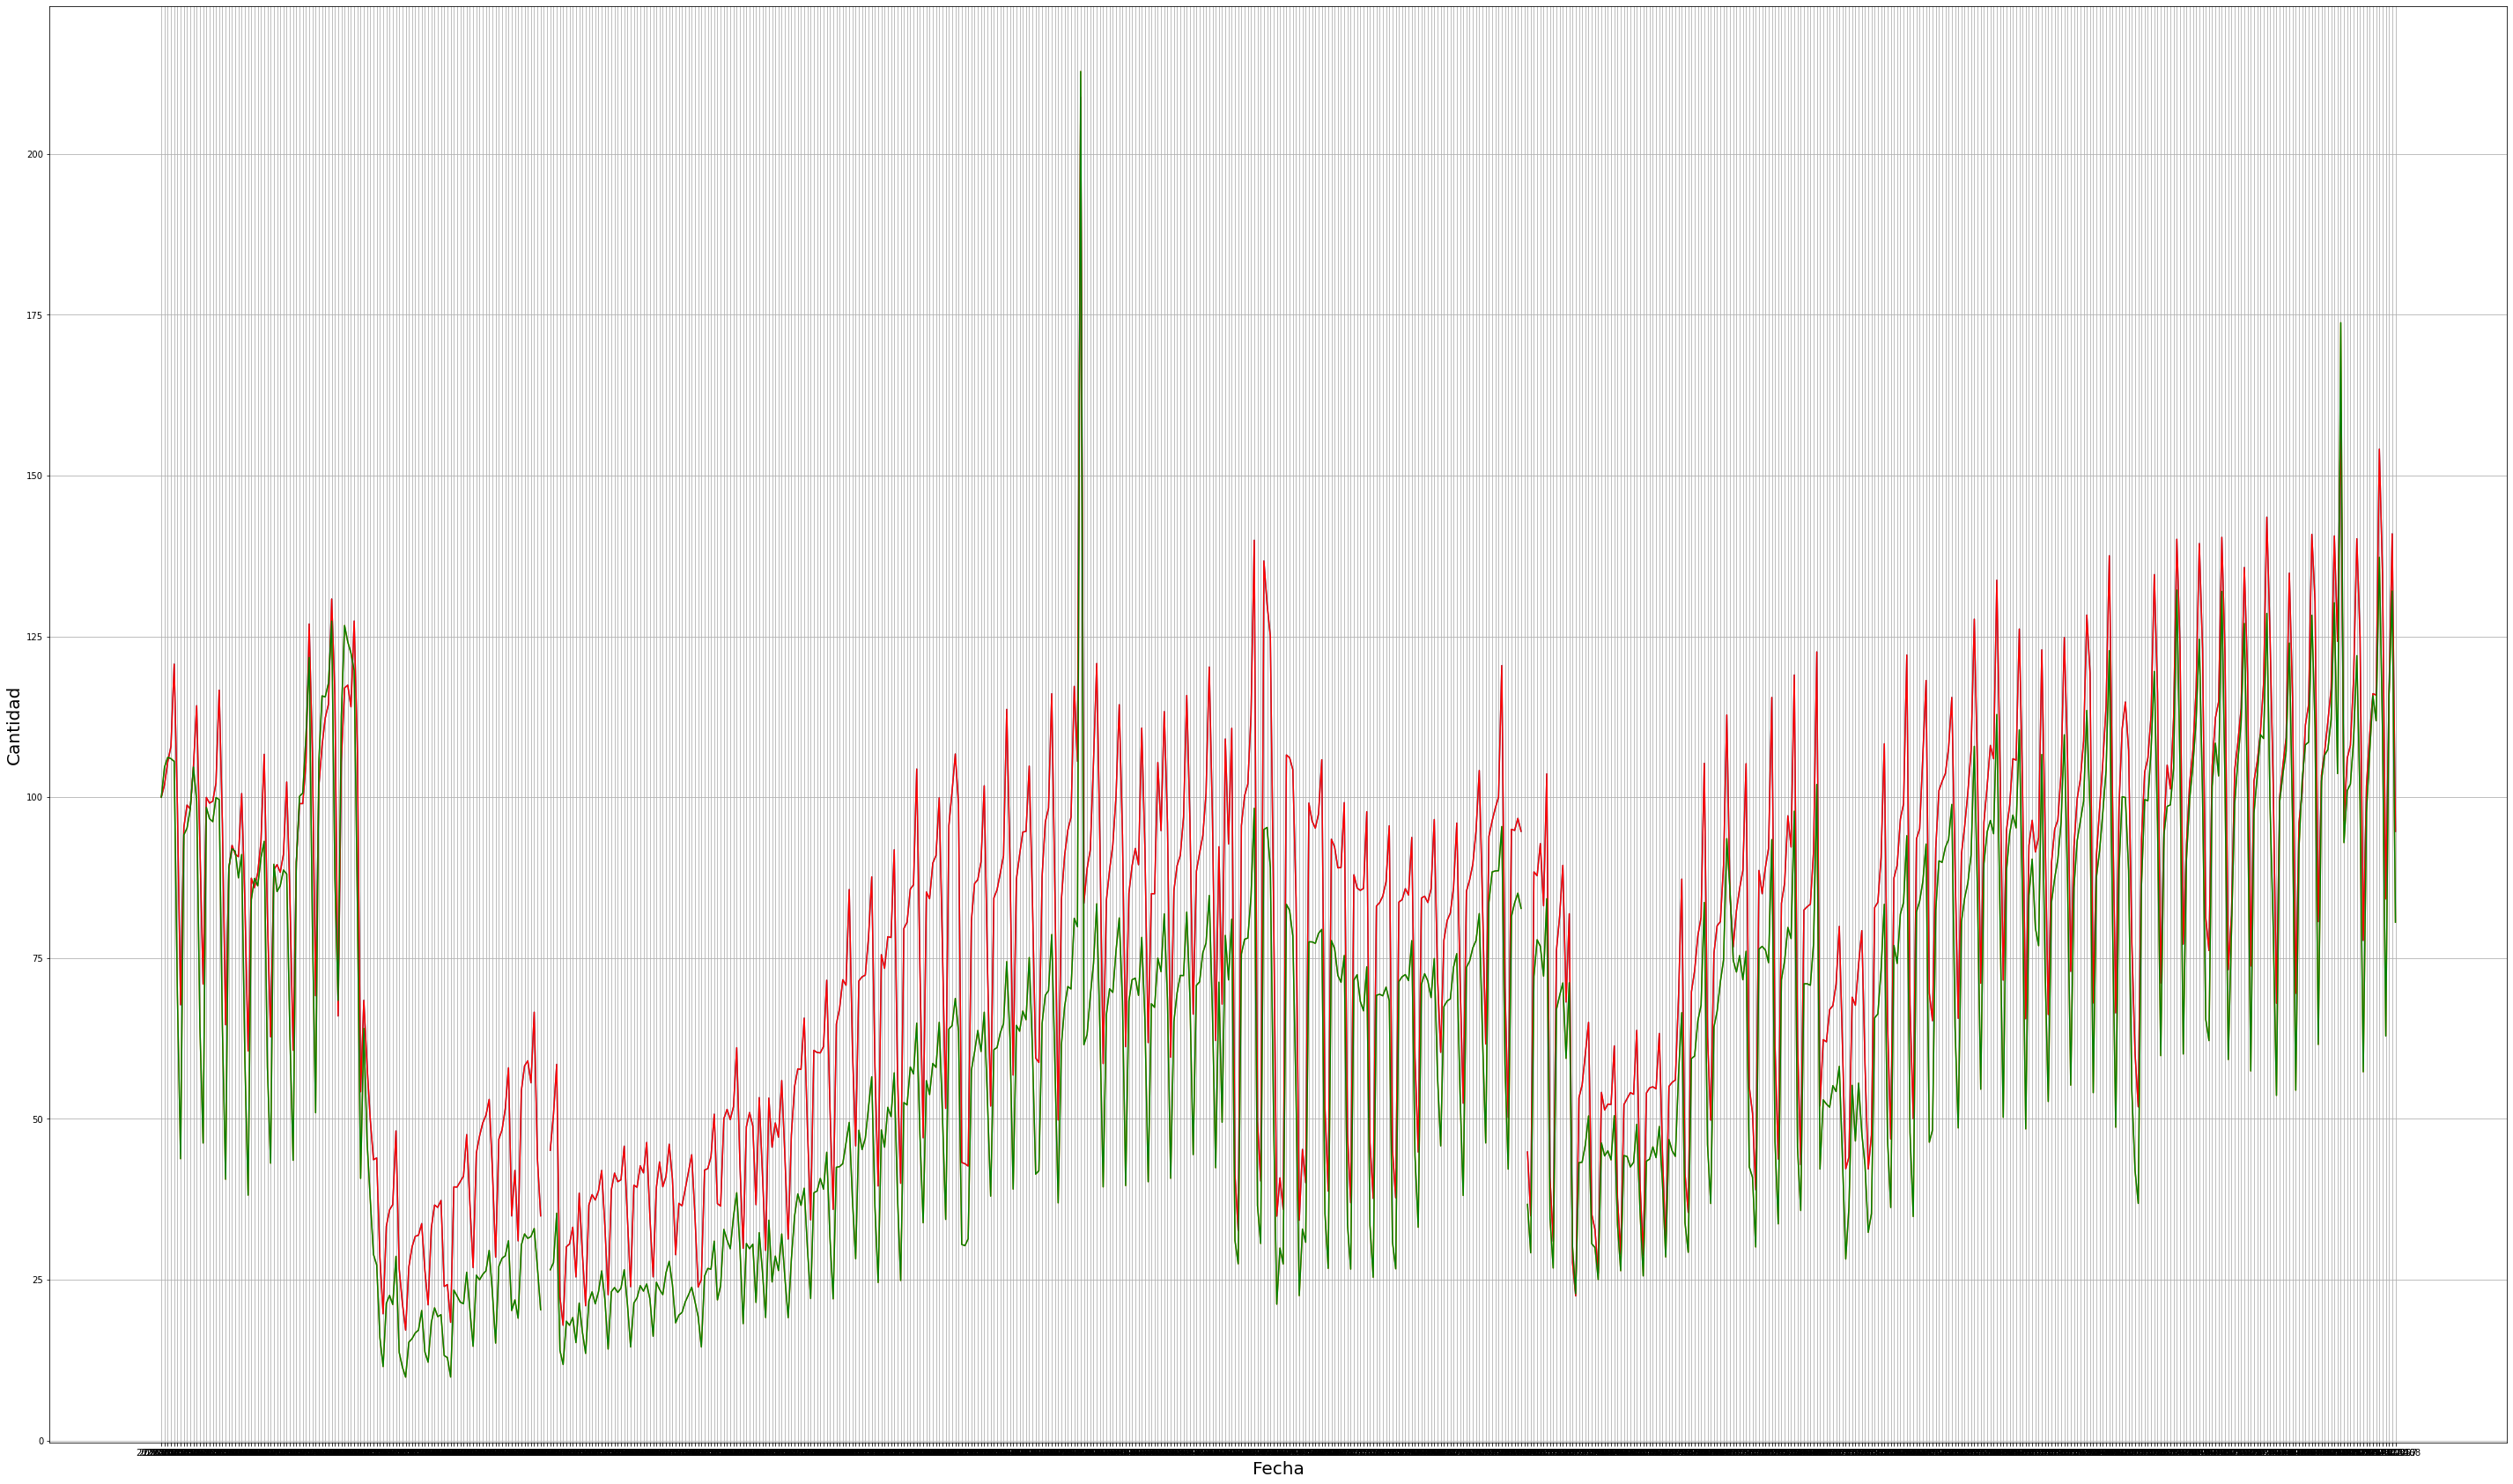

In [28]:
x=camina["fecha"]
y_1 = maneja["cantidad"]
y_2 = camina["cantidad"]
plt.figure(figsize=(50,30))
plt.plot(x,y_1, label='Maneja')
plt.plot(x,y_2, label = 'Camina')
plt.plot(x,y_1,'r',x,y_2,'g')

plt.xlabel("Fecha",fontsize=20)
plt.ylabel("Cantidad",fontsize=20)
plt.grid()
plt.show()
## Se genera el gráfico.

De color rojo podemos ver a las personas que manejan y de color verde a las que caminan, y podemos conlcuir de este gráfico que las personas que manejan superan a las que caminan.

In [29]:
datosgoogle

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929038,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-11-30,NaN,NaN,NaN,NaN,62.0,NaN
7929039,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-12-01,NaN,NaN,NaN,NaN,55.0,NaN
7929040,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-12-02,NaN,NaN,NaN,NaN,54.0,NaN
7929041,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-12-03,NaN,NaN,NaN,NaN,58.0,NaN


In [30]:
datoschile= datosgoogle[datosgoogle['country_region_code']=='CL']
datoschile
## Se filtran los datos para Chile.

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2200129,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-15,2.0,4.0,9.0,0.0,-3.0,0.0
2200130,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-16,3.0,5.0,5.0,4.0,-1.0,0.0
2200131,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-17,1.0,6.0,11.0,-3.0,-8.0,1.0
2200132,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-18,0.0,5.0,13.0,-3.0,-7.0,1.0
2200133,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-19,0.0,8.0,11.0,-3.0,-7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246687,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2021-12-02,-7.0,13.0,-24.0,13.0,18.0,7.0
2246688,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2021-12-03,-3.0,13.0,-16.0,8.0,16.0,8.0
2246689,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2021-12-04,-2.0,11.0,-25.0,3.0,3.0,7.0
2246690,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2021-12-05,-7.0,9.0,-29.0,-4.0,4.0,7.0


In [31]:
datoschilerm= datosgoogle[datosgoogle['sub_region_1']=='Santiago Metropolitan Region']
datoschilerm

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2234217,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2234218,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-16,-6.0,-3.0,-12.0,-2.0,0.0,-1.0
2234219,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-17,-8.0,-3.0,-10.0,-8.0,-9.0,1.0
2234220,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-18,-9.0,-4.0,-10.0,-8.0,-8.0,1.0
2234221,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-19,-8.0,-4.0,-10.0,-8.0,-8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238839,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-02,31.0,38.0,14.0,-4.0,20.0,8.0
2238840,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-03,35.0,42.0,12.0,28.0,20.0,9.0
2238841,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-04,13.0,28.0,8.0,-6.0,16.0,6.0
2238842,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-05,9.0,34.0,2.0,-32.0,11.0,6.0


In [32]:
datosparques=datoschilerm[['date','parks_percent_change_from_baseline',]]
datoschilerm.sort_values(by='date')
datosparques
## Se eliminan las columnas que no se necesitan y se ordena por fecha.

,date,parks_percent_change_from_baseline
2234217,2020-02-15,-9.0
2234218,2020-02-16,-12.0
2234219,2020-02-17,-10.0
2234220,2020-02-18,-10.0
2234221,2020-02-19,-10.0
...,...,...
2238839,2021-12-02,14.0
2238840,2021-12-03,12.0
2238841,2021-12-04,8.0
2238842,2021-12-05,2.0


In [33]:
datosparques = datosparques.rename(columns = {"parks_percent_change_from_baseline" : "Porcentaje_Parques","date":"Fecha"})
datosparques = datosparques.dropna()
datosparques
## Se cambian los nombres de las columnas y se eliminan los datos nulos.

,Fecha,Porcentaje_Parques
2234217,2020-02-15,-9.0
2234218,2020-02-16,-12.0
2234219,2020-02-17,-10.0
2234220,2020-02-18,-10.0
2234221,2020-02-19,-10.0
...,...,...
2238839,2021-12-02,14.0
2238840,2021-12-03,12.0
2238841,2021-12-04,8.0
2238842,2021-12-05,2.0


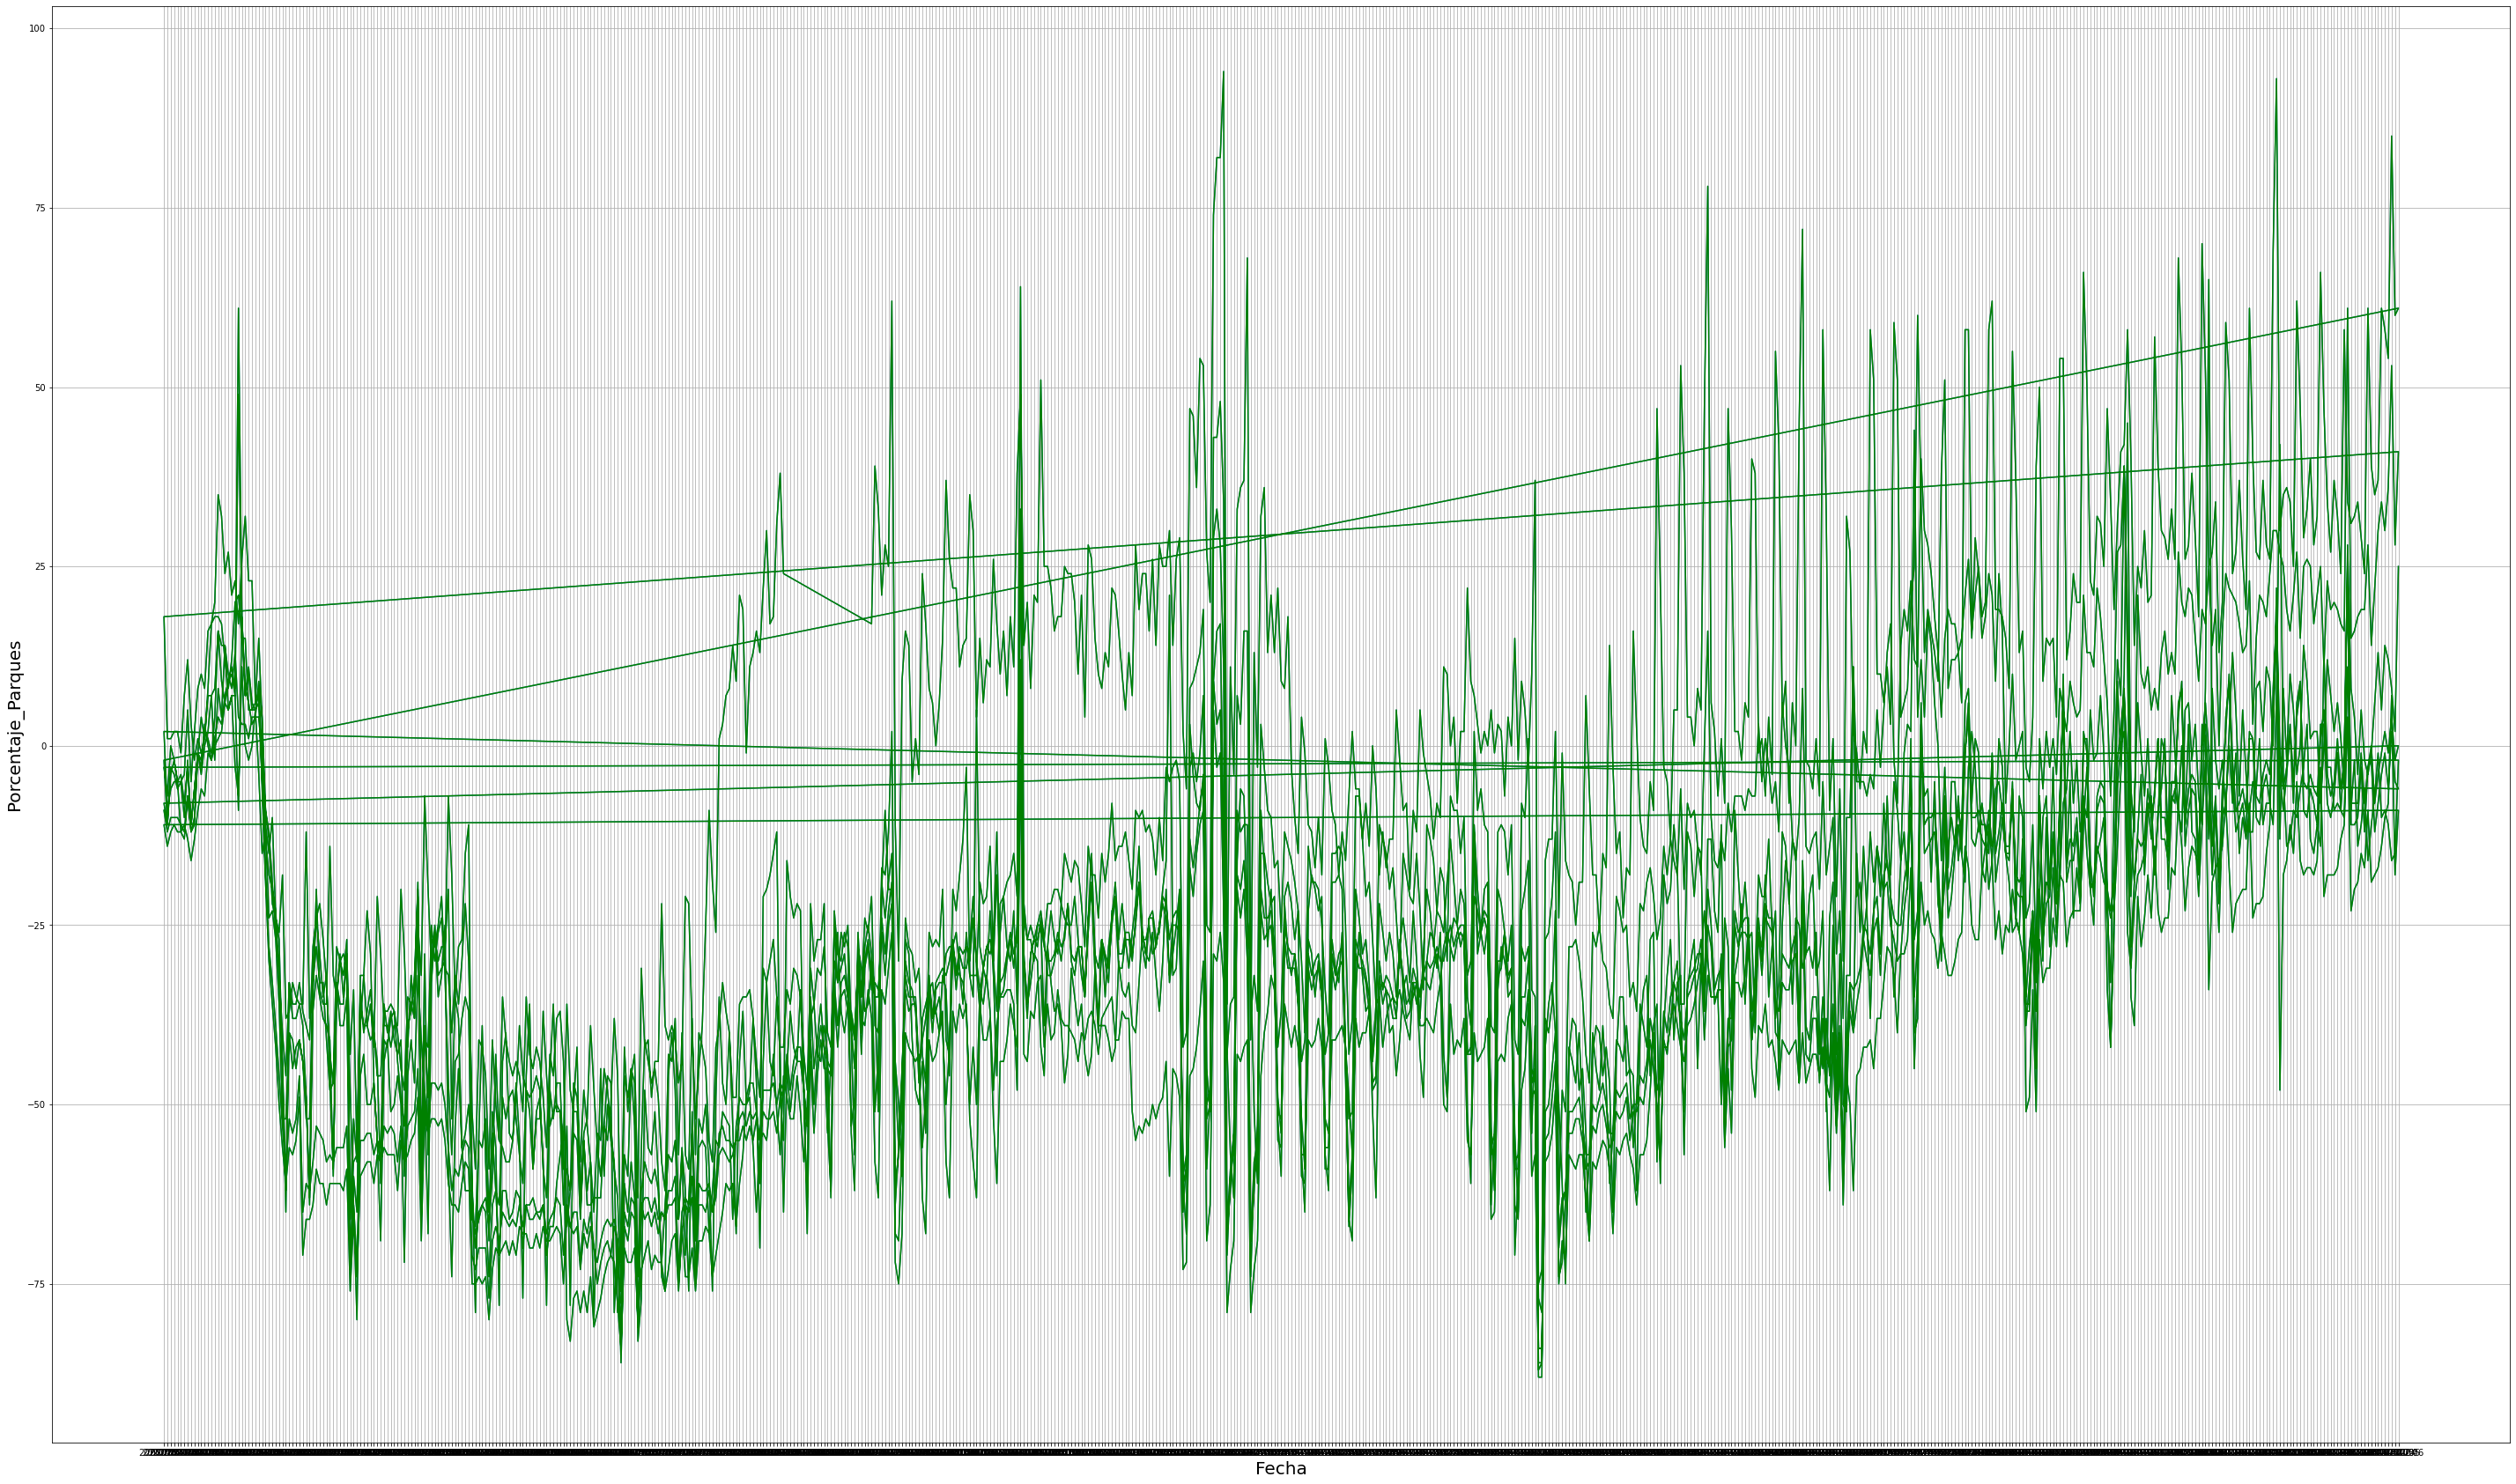

In [34]:
x=datosparques["Fecha"]
y = datosparques["Porcentaje_Parques"]
plt.figure(figsize=(50,30))
plt.plot(x,y, label='Porcentaje_Parques')
plt.plot(x,y,'g')

plt.xlabel("Fecha",fontsize=20)
plt.ylabel("Porcentaje_Parques",fontsize=20)
plt.grid()
plt.show()
## Se genera el gráfico.

En el inicio se ve que hay una baja considerable en la visita a los parques y luego se ve una tendencia a la alta en la visita de los parques.